In [43]:
import torch
import tensorflow as tf
import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os

1 How do you install and verify that TensorFlow 2.0 was installed successfully ?

In [ ]:
%pip install tensorflow

2 How can you define a simple function in TensorFlow 2.0 to perform addition ?

In [2]:
@tf.function
def add(x, y):
    return tf.add(x, y)

add([1,3,4] , [3,5,-6])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 4,  8, -2])>

3 How can you create a simple neural network in TensorFlow 2.0 with one hidden layer ?

In [8]:
def create_model():
    model = models.Sequential([
        layers.Input((32,)),
        layers.Dense(10 , activation='relu'),  
        layers.Dense(1 , activation= 'softmax')
    ])
    return model

model = create_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 341 (1.33 KB)

 Trainable params: 341 (1.33 KB)

 Non-trainable params: 0 (0.00 B)

4 How can you visualize the training progress using TensorFlow and Matplotlib ?

Epoch 1/50


C:\Users\suman\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4547 - loss: 0.7314 - val_accuracy: 0.4400 - val_loss: 0.7060
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5181 - loss: 0.6968 - val_accuracy: 0.4700 - val_loss: 0.7015
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5330 - loss: 0.6889 - val_accuracy: 0.5050 - val_loss: 0.7003
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5947 - loss: 0.6767 - val_accuracy: 0.5050 - val_loss: 0.7016
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5761 - loss: 0.6756 - val_accuracy: 0.5150 - val_loss: 0.7006
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6106 - loss: 0.6678 - val_accuracy: 0.5100 - val_loss: 0.7011
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6159 - loss: 0.6606 - val_accuracy: 0.4950 - val_loss: 0.7025
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6178 - loss: 0.6601 - val_accuracy: 0.5300 - val_loss: 0.7018
Ep

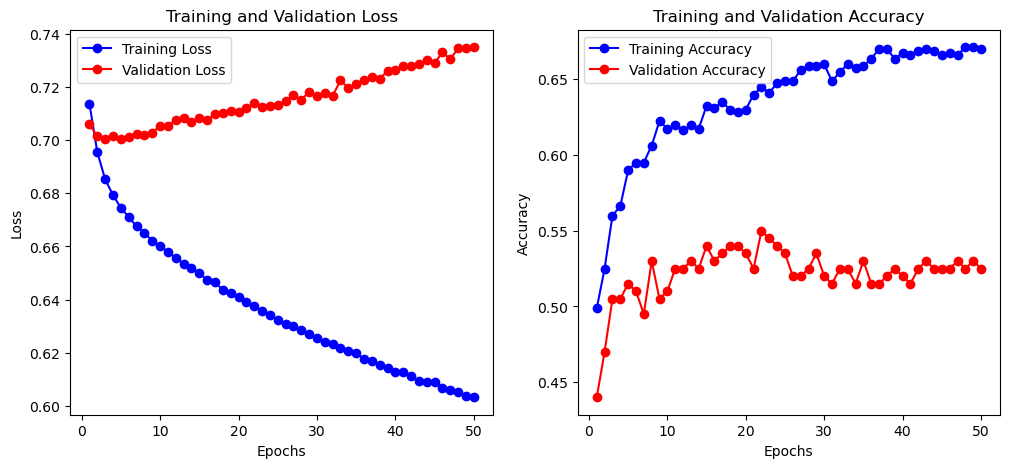

In [33]:

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
X_train = tf.random.normal((1000, 10))
y_train = tf.random.uniform((1000,), maxval=2, dtype=tf.int32)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)
def plot_training_history(history):
    epochs = range(1, len(history.history['loss']) + 1)

    # Plot loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.show()
plot_training_history(history)


5 How do you install PyTorch and verify the PyTorch installation ?

In [ ]:
%pip install torch

# for check enter in command promt
%torch -v

6 How do you create a simple neural network in PyTorch ?

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First layer
        self.relu = nn.ReLU()  # Activation function
        self.fc2 = nn.Linear(hidden_size, output_size)  # Output layer
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Model parameters
input_size = 10  # Number of input features
hidden_size = 32  # Number of hidden neurons
output_size = 1  # Output size (e.g., regression)

# Initialize the model
model = SimpleNN(input_size, hidden_size, output_size)


7 How do you define a loss function and optimizer in PyTorch ?

In [36]:
def custom_loss(y_pred, y_true):
    return torch.mean(torch.abs(y_pred - y_true)) 

8 How do you save and load a TensorFlow model ?

In [46]:
#create a model
def create_model():
    model=models.Sequential([
        layers.Dense(10, activation='relu') , 
        layers.Dense(20 , activation='relu') ,
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer = 'adam' , loss = 'mse' ,metrics = ['accuracy'])
    return model
model = create_model()
#saving the model
model.save(filepath=os.getcwd()+ "\custom.keras")
#load the model
path = os.getcwd()+"\custom.keras"
model = models.load_model(path)

C:\Users\suman\AppData\Roaming\Python\Python311\site-packages\keras\src\saving\saving_api.py:102: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)
